<a href="https://colab.research.google.com/github/catastropiyush/blogosarus/blob/main/pynucastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [ ]:
!pip install pynucastro

In [2]:
import pynucastro as pyna

In [3]:
rl = pyna.ReacLibLibrary()

In [4]:
pp_rates = ["p(p,)d",
            "d(p,g)he3",
            "he3(he3,pp)he4"]
rates = rl.get_rate_by_name(pp_rates)

In [5]:
for r in rates:
    print(r)

p + p ⟶ H2 + e⁺ + 𝜈
p + p + e⁻ ⟶ H2 + 𝜈
H2 + p ⟶ He3 + 𝛾
He3 + He3 ⟶ p + p + He4


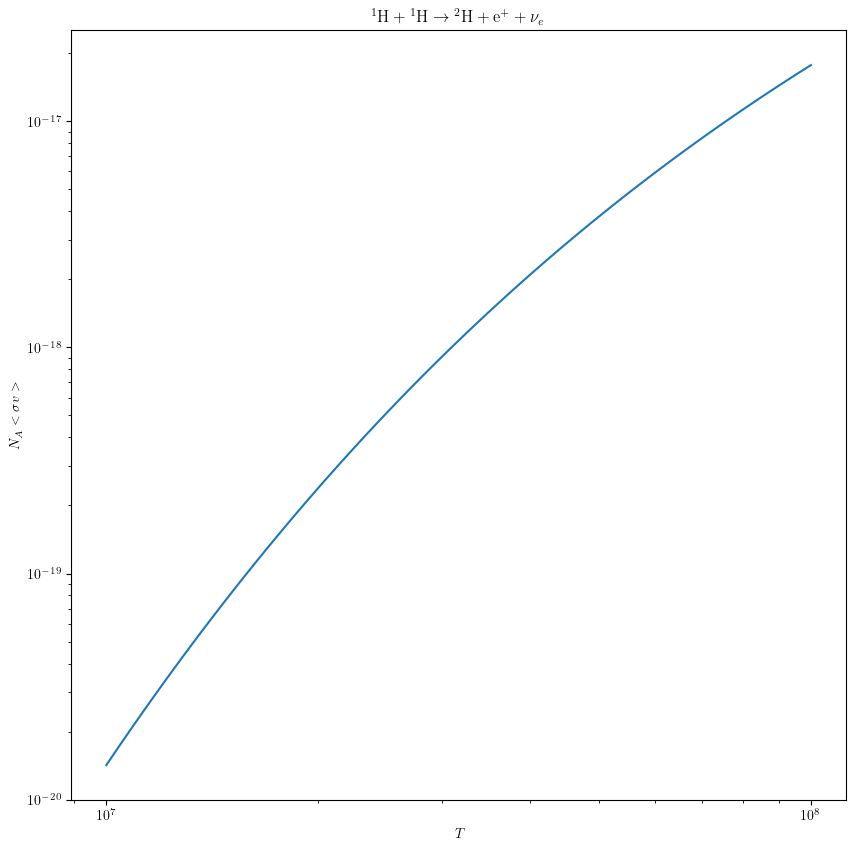

In [8]:
r = rates[0]
fig = r.plot(Tmin=1.e7, Tmax=1.e8)

In [9]:
net_pp = pyna.RateCollection(rates=rates)

In [10]:
T = 1.5e7
rho = 150
comp = pyna.Composition(net_pp.unique_nuclei)
comp.set_solar_like()

In [11]:
net_pp.evaluate_rates(rho, T, comp)

{p + p ⟶ H2 + e⁺ + 𝜈: 2.978374743269655e-18,
 p + p + e⁻ ⟶ H2 + 𝜈: 1.357778476769111e-20,
 H2 + p ⟶ He3 + 𝛾: 0.005874533290651895,
 He3 + He3 ⟶ p + p + He4: 1.849294558580789e-13}

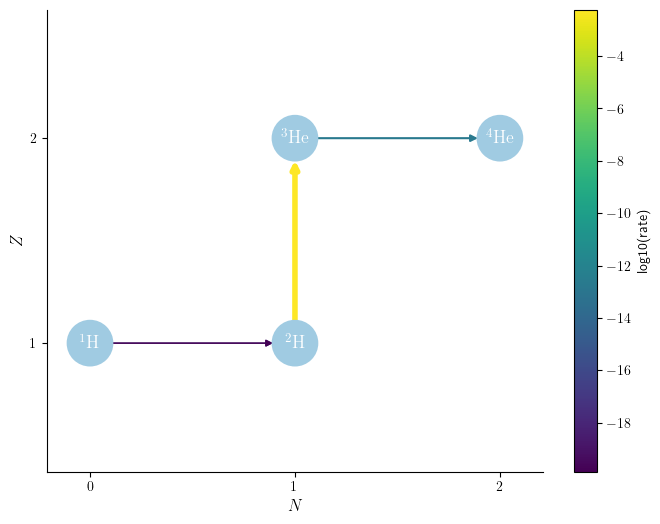

In [12]:
fig = net_pp.plot(rho=rho, T=T, comp=comp, hide_xp=True, always_show_alpha=True)

In [13]:
r_pp = net_pp.get_rate_by_name("p(p,)d")[0]
T0 = 1.5e7
r_pp.get_rate_exponent(T0)

3.9735120801889896

In [14]:
cno_rates = ["c12(p,g)n13",
             "c13(p,g)n14",
             "n13(,)c13",
             "n14(p,g)o15",
             "n15(p,a)c12",
             "o15(,)n15"]
rates = rl.get_rate_by_name(cno_rates)

In [15]:
for r in rates:
    print(r)

C12 + p ⟶ N13 + 𝛾
C13 + p ⟶ N14 + 𝛾
N13 ⟶ C13 + e⁺ + 𝜈
N14 + p ⟶ O15 + 𝛾
N15 + p ⟶ He4 + C12
O15 ⟶ N15 + e⁺ + 𝜈


In [16]:
net_cno = pyna.RateCollection(rates=rates)

In [17]:
comp = pyna.Composition(net_cno.unique_nuclei)
comp.set_solar_like()

In [18]:
net_cno.evaluate_rates(rho, T, comp)

{C12 + p ⟶ N13 + 𝛾: 1.0467759242295144e-17,
 C13 + p ⟶ N14 + 𝛾: 3.176211597339995e-17,
 N13 ⟶ C13 + e⁺ + 𝜈: 2.9720852738029567e-07,
 N14 + p ⟶ O15 + 𝛾: 1.7295781984662848e-20,
 N15 + p ⟶ He4 + C12: 6.954822248932605e-16,
 O15 ⟶ N15 + e⁺ + 𝜈: 1.2625681768893481e-06}

In [19]:
r_cno = net_cno.get_rate_by_name("n14(p,g)o15")

In [20]:
for T in [1.e7, 2.e7, 3.e7, 4.e7]:
    print(f"T = {T}, nu = {r_cno.get_rate_exponent(T):8.5f}")

T = 10000000.0, nu = 22.82962
T = 20000000.0, nu = 17.96637
T = 30000000.0, nu = 15.60186
T = 40000000.0, nu = 14.11535


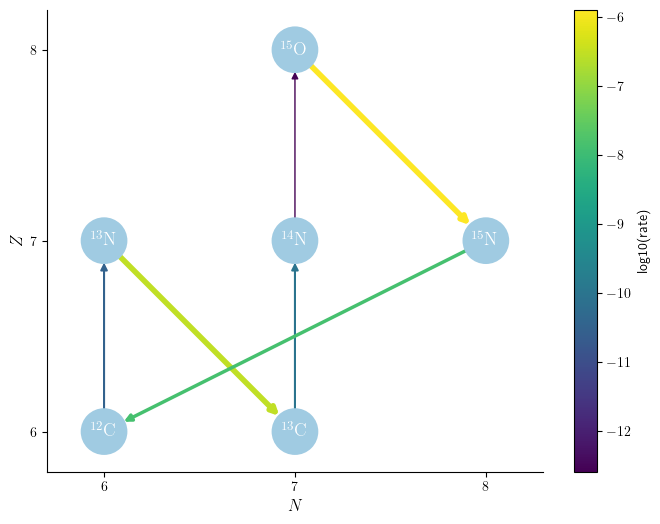

In [21]:
fig = net_cno.plot(rho=rho, T=T, comp=comp, hide_xp=True)

In [24]:
Ts = np.logspace(6.8, 8, 50)

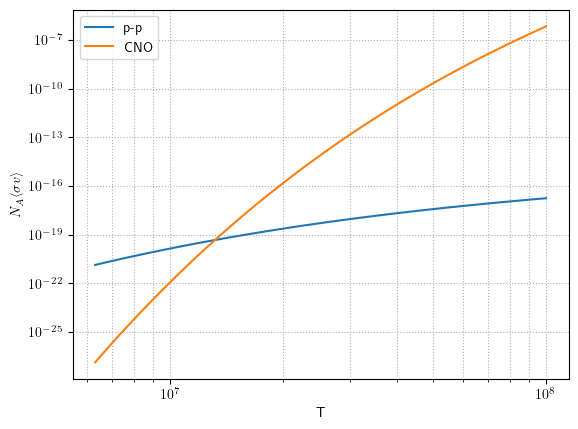

In [25]:
fig, ax = plt.subplots()

ax.loglog(Ts, [r_pp.eval(q) for q in Ts], label="p-p")
ax.loglog(Ts, [r_cno.eval(q) for q in Ts], label="CNO")
ax.set_xlabel("T")
ax.set_ylabel(r"$N_A\langle \sigma v \rangle$")
ax.grid(linestyle=":", which="both")
leg = ax.legend()

In [26]:
nuclei = pyna.get_all_nuclei()

In [27]:
len(nuclei)

3558

In [28]:
nuc_bound = max(nuclei, key=lambda n : n.nucbind)
nuc_bound

Ni62

In [29]:
As = [n.A for n in nuclei]
BEs = [n.nucbind for n in nuclei]

Text(0, 0.5, 'binding energy per nucleon')

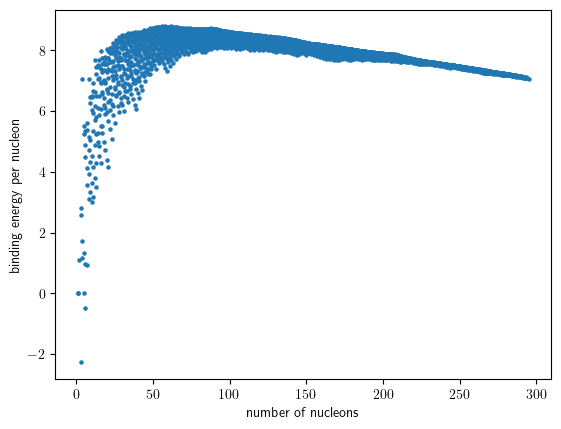

In [30]:
fig, ax = plt.subplots()
ax.scatter(As, BEs, s=5)
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon")

In [31]:
nuc = ["H1", "H2", "H3", "He3", "He4",
       "Li6", "Li7", "Be9", "B10", "B11",
       "C12", "C13", "N14", "O16", "F19",
       "Ne20", "Na23", "Mg24", "Al27", "Si28",
       "P31", "S32", "Cl35", "Cl37", "K39",
       "Ar40", "Ca40", "Sc45", "Ti48", "V51",
       "Cr52", "Mn55", "Fe56", "Ni58", "Co59",
       "Ni60", "Cu63", "Zn64", "Cu65", "Zn66",
       "Zn68", "Ga68", "Ge70", "Ga71", "Ge72",
       "Ge74", "As75", "Se78", "Br79", "Se80",
       "Br81", "Kr84", "Rb85", "Sr88", "Zr90",
       "Nb93", "Zr94", "Mo95", "Mo96", "Mo98",
       "Tc98", "Ru102", "Rh103", "Pd105", "Pd106",
       "Ag107", "Pd108", "Ag109", "Cd112", "Cd114",
       "In115", "Sn118", "Sn120", "Sb121", "Sb123",
       "I127", "Te128", "Xe129", "Te130", "Xe131",
       "Xe132", "Cs133", "Ba138", "La139", "Ce140",
       "Pr141", "Nd142", "Pm145", "Eu151", "Sm152",
       "Eu153", "Sm154", "Gd156", "Gd158", "Dy162",
       "Dy163", "Dy164", "Ho165", "Er166", "Er167",
       "Er168", "Tm169", "Yb172", "Lu175", "Hf178",
       "Hf180", "Ta181", "W182", "W184", "Re185",
       "W186", "Re187", "Os190", "Ir191", "Os120",
       "Ir193", "Pt194", "Pt195", "Pt196", "Au197",
       "Hg200", "Hg202", "Tl203", "Tl205", "Pb206",
       "Pb208", "Bi209", "Po209", "At210", "Rn222",
       "Fr223", "Ra226", "Ac227", "Pa231", "Th232",
       "U235", "U238"]

new_nuc = [pyna.Nucleus(name) for name in nuc]

In [32]:
As = [n.A for n in new_nuc]
BEs = [n.nucbind for n in new_nuc]

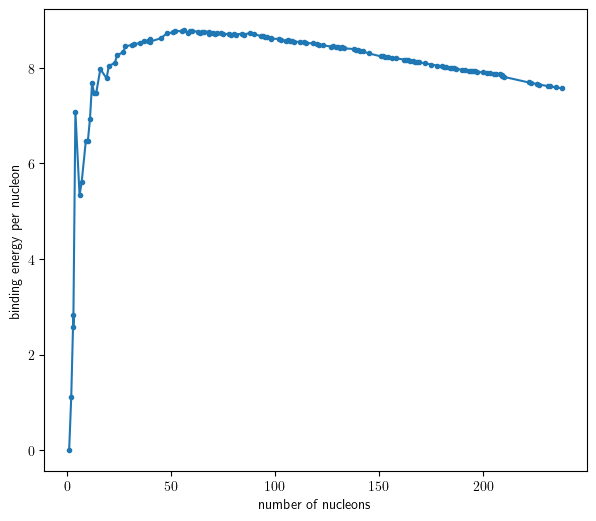

In [33]:
fig, ax = plt.subplots()
ax.plot(As, BEs, marker="o", markersize="3")
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon")
fig.set_size_inches((7, 6))

In [34]:
max_Z = max(nuclei, key=lambda n : n.Z).Z
max_N = max(nuclei, key=lambda n : n.N).N

In [35]:
dm_mag = abs(max(nuclei, key=lambda n: abs(n.dm)).dm)
dm_mag

201.37

In [36]:
dm = np.zeros((max_Z+1, max_N+1))
be = np.zeros((max_Z+1, max_N+1))

In [37]:
dm[:,:] = np.nan
be[:,:] = np.nan

In [38]:
for n in nuclei:
    dm[n.Z, n.N] = n.dm
    be[n.Z, n.N] = n.nucbind

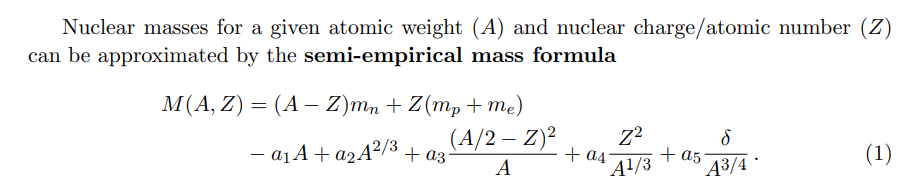

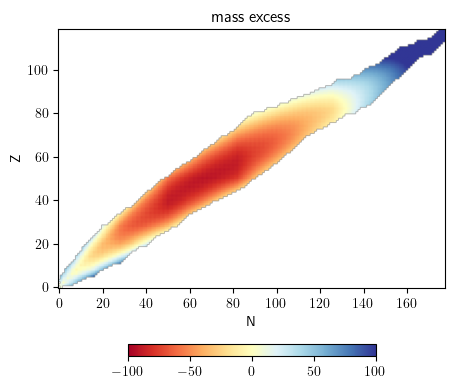

In [40]:
# mask out the regions with no nuclei
cmap = plt.colormaps['RdYlBu']
cmap.set_bad(color='white')

fig, ax = plt.subplots()
im = ax.imshow(dm, origin="lower", cmap="RdYlBu",
               vmin=-100, vmax=100)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("mass excess")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)

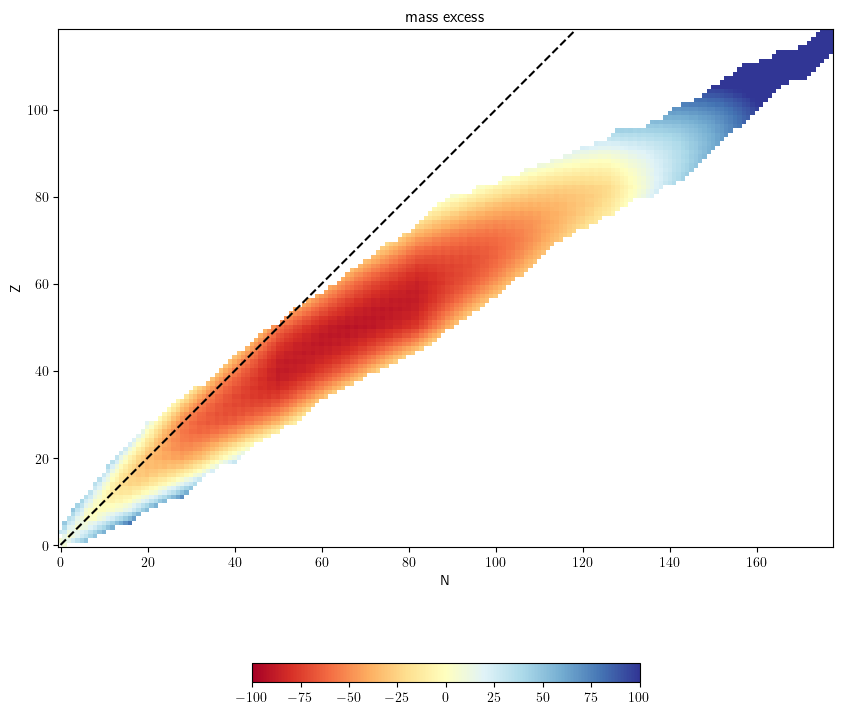

In [46]:
cmap = plt.colormaps['RdYlBu']
cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(dm, origin="lower", cmap="RdYlBu",
               vmin=-100, vmax=100)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("mass excess")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)

# Assuming dm is a 2D numpy array
# Swap the dimensions to match Z (y-axis) and N (x-axis)
x_coords = np.arange(dm.shape[0])  # N should correspond to the x-axis
y_coords = np.arange(dm.shape[1])  # Z should correspond to the y-axis

# Limit the plot to the diagonal line, where Z=N
limit = min(dm.shape[0], dm.shape[1]) # Get the smaller dimension
x_coords = x_coords[:limit] # Trim both arrays to the smaller dimension
y_coords = y_coords[:limit] # Trim both arrays to the smaller dimension

ax.plot(x_coords, y_coords, color='black', linestyle='--') # Plot y=x
plt.show()

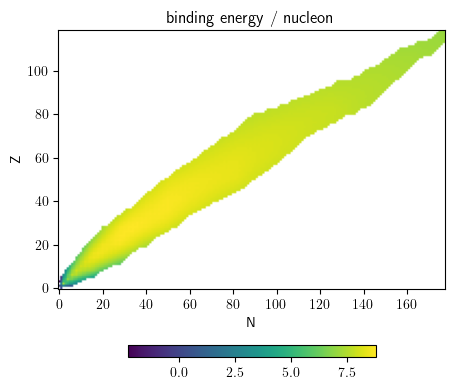

In [41]:
# mask out the regions with no nuclei
cmap = plt.colormaps['viridis']
cmap.set_bad(color='white')

fig, ax = plt.subplots()
im = ax.imshow(be, origin="lower", cmap=cmap)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("binding energy / nucleon")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)